<a href="https://colab.research.google.com/github/cliverFray/cliverAImodels/blob/main/F61_RecommendationSystem_No_Personalizadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sistemas de Recomendación no personalizados

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Automcompletar rápido
%config IPCompleter.greedy=True

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_user_movies = pd.read_csv('/content/drive/MyDrive/Lab01/00_DATASETS/user_ratings.csv')
df_user_movies

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller


In [ ]:
df_user_movies.sort_values('userId')

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
12117,1,2389,2.0,964983094,Psycho (1998),Crime|Horror|Thriller
12126,1,2395,5.0,964981093,Rushmore (1998),Comedy|Drama
12182,1,2406,4.0,964982310,Romancing the Stone (1984),Action|Adventure|Comedy|Romance
776,1,70,3.0,964982400,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller
...,...,...,...,...,...,...
84152,610,51709,5.0,1479545147,"Host, The (Gwoemul) (2006)",Comedy|Drama|Horror|Sci-Fi|Thriller
26937,610,589,5.0,1479542983,Terminator 2: Judgment Day (1991),Action|Sci-Fi
69808,610,66097,4.0,1493846499,Coraline (2009),Animation|Fantasy|Thriller
69820,610,71464,4.0,1479544359,"Serious Man, A (2009)",Comedy|Drama


## Recomendación: Por cantidad de reviews (popularidad)

In [ ]:
pelicula_popular = df_user_movies['title'].value_counts()

print('\n 1.peliculas con mas reviews')
pelicula_popular.head(5).sort_values(ascending = False)



 1.peliculas con mas reviews


Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: title, dtype: int64

## Recomendación: Por el rate

In [ ]:
pelicula_rate = df_user_movies[['title','rating']]
print('\n 1.info de pelicula y su rate')
print(pelicula_rate.head(5))

#Promedio del rate por pelicula
pelicula_rate = pelicula_rate.groupby(['title']).mean()
print('\n 2.promedio de rate por película')
print(pelicula_rate.head(5))

#Ordenamos por rate
pelicula_rate = pelicula_rate.sort_values(by = 'rating', ascending=False)
print('\n 3.las mejores peliculas por rate')
print(pelicula_rate.head(5))



 1.info de pelicula y su rate
              title  rating
0  Toy Story (1995)     4.0
1  Toy Story (1995)     4.0
2  Toy Story (1995)     4.5
3  Toy Story (1995)     2.5
4  Toy Story (1995)     4.5

 2.promedio de rate por película
                                         rating
title                                          
'71 (2014)                                  4.0
'Hellboy': The Seeds of Creation (2004)     4.0
'Round Midnight (1986)                      3.5
'Salem's Lot (2004)                         5.0
'Til There Was You (1997)                   4.0

 3.las mejores peliculas por rate
                                     rating
title                                      
Gena the Crocodile (1969)               5.0
True Stories (1986)                     5.0
Cosmic Scrat-tastrophe (2015)           5.0
Love and Pigeons (1985)                 5.0
Red Sorghum (Hong gao liang) (1987)     5.0


## Recomendación: Combinando el rate y reviews

In [ ]:
df_user_movies[df_user_movies['title']=='Gena the Crocodile (1969)']

,userId,movieId,rating,timestamp,title,genres
88684,105,175293,5.0,1526208082,Gena the Crocodile (1969),Animation|Children


In [ ]:
df_user_movies[df_user_movies['title']=='Toy Story (1995)']

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
210,606,1,2.5,1349082950,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
211,607,1,4.0,964744033,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
212,608,1,2.5,1117408267,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
213,609,1,3.0,847221025,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [ ]:
pelicula_popular = df_user_movies['title'].value_counts() ##retorna series

print('\n1.Cantidad de reviews por película')
print(pelicula_popular.head(5))

print('\n2.Cantidad de reviews de las que tienen mayor rate - solo tienen 1 review (sesgo)')
print(pelicula_popular[pelicula_popular.index == 'Gena the Crocodile (1969)'])
print(pelicula_popular[pelicula_popular.index == 'Love and Pigeons (1985)'])

print('\n3.Las películas con mas de 50 vistas o reviews')
pelicula_mas_vistas = pelicula_popular[pelicula_popular > 50].index
print(pelicula_mas_vistas[:5])

print('\n4.Recuperar las peliculas y el rate de aquellas con mas de 50 reviews')
condicion = df_user_movies['title'].isin(pelicula_mas_vistas)
pelicula_rate = df_user_movies[condicion]
print(pelicula_rate.head(5))

print('\n5.Obtener el promedio del Rate de las peliculas seleccionadas')
pelicula_popular_rate_ranking = pelicula_rate[['title','rating']].groupby(by = 'title').agg(['mean','count']).reset_index()
#df[['source','sent']].groupby('source').agg(['count','mean'])
pelicula_popular_rate_ranking = pelicula_popular_rate_ranking.sort_values(by=('rating','mean'), ascending=False)
#pelicula_popular_rate_ranking = pelicula_popular_rate_ranking.sort_values(by=('rating'), ascending=False)
pelicula_popular_rate_ranking.head(5)


1.Cantidad de reviews por película
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: title, dtype: int64

2.Cantidad de reviews de las que tienen mayor rate - solo tienen 1 review (sesgo)
Gena the Crocodile (1969)    1
Name: title, dtype: int64
Love and Pigeons (1985)    1
Name: title, dtype: int64

3.Las películas con mas de 50 vistas o reviews
Index(['Forrest Gump (1994)', 'Shawshank Redemption, The (1994)',
       'Pulp Fiction (1994)', 'Silence of the Lambs, The (1991)',
       'Matrix, The (1999)'],
      dtype='object')

4.Recuperar las peliculas y el rate de aquellas con mas de 50 reviews
   userId  movieId  rating   timestamp             title  \
0       1        1     4.0   964982703  Toy Story (1995)   
1       5        1     4.0   847434962  Toy Story (1995)   
2       7        1     4.5  1106635946  Toy Story (1995)   


title    rating      
                                                            mean count
343                   Shawshank Redemption, The (1994)  4.429022   317
170                              Godfather, The (1972)  4.289062   192
151                                  Fight Club (1999)  4.272936   218
107                              Cool Hand Luke (1967)  4.271930    57
131  Dr. Strangelove or: How I Learned to Stop Worr...  4.268041    97

## Recomendación: Elementos que se ven juntos con mas frecuencia
 * Identificar cuando dos películas sean vistos por la misma persona
 * Contar la frecuencia de veces que aparece este par en todo el conjunto de datos
 * Finalmente, si viste una película (te gusta) es probable te guste el otro
 * El dataset debe tener la forma de pelicula1 | pelicula2. Además
 * Si un usuario vió la pelicula1 y la pelicula2 formando el par (pelicula1,pelicula2), se debe registrar también el par (pelicula2,pelicula1)

In [ ]:
df_user_movies.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [ ]:
# Función que permita crear los pares de libros
from itertools import permutations
def crear_pares(x):
    list_pares = list(permutations(x.values, 2))
    df_pares = pd.DataFrame(data = list_pares, columns = ['movie_a','movie_b'])
    return df_pares

In [ ]:
print('\n1.Crear los pares de elementos')
peliculas_pares = df_user_movies.groupby('userId')['title'].apply(crear_pares)
print(peliculas_pares.head(20))


1.Crear los pares de elementos
                    movie_a                                    movie_b
userId                                                                
1      0   Toy Story (1995)                    Grumpier Old Men (1995)
       1   Toy Story (1995)                                Heat (1995)
       2   Toy Story (1995)                Seven (a.k.a. Se7en) (1995)
       3   Toy Story (1995)                 Usual Suspects, The (1995)
       4   Toy Story (1995)                 From Dusk Till Dawn (1996)
       5   Toy Story (1995)                       Bottle Rocket (1996)
       6   Toy Story (1995)                          Braveheart (1995)
       7   Toy Story (1995)                             Rob Roy (1995)
       8   Toy Story (1995)                      Canadian Bacon (1995)
       9   Toy Story (1995)                           Desperado (1995)
       10  Toy Story (1995)                       Billy Madison (1995)
       11  Toy Story (1995)                  

In [ ]:
print('\n2.Eliminar el índice userId')
peliculas_pares = peliculas_pares.reset_index(drop=True)
print(peliculas_pares.head(10))


2.Eliminar el índice userId
            movie_a                      movie_b
0  Toy Story (1995)      Grumpier Old Men (1995)
1  Toy Story (1995)                  Heat (1995)
2  Toy Story (1995)  Seven (a.k.a. Se7en) (1995)
3  Toy Story (1995)   Usual Suspects, The (1995)
4  Toy Story (1995)   From Dusk Till Dawn (1996)
5  Toy Story (1995)         Bottle Rocket (1996)
6  Toy Story (1995)            Braveheart (1995)
7  Toy Story (1995)               Rob Roy (1995)
8  Toy Story (1995)        Canadian Bacon (1995)
9  Toy Story (1995)             Desperado (1995)


In [ ]:
print('\n3.Calcular la cantidad de pares de películas repetidas')
peliculas_pares = peliculas_pares.groupby(['movie_a','movie_b']).size()
peliculas_pares.head(20)


3.Calcular la cantidad de pares de películas repetidas


movie_a     movie_b                                              
'71 (2014)  (500) Days of Summer (2009)                              1
            10 Cloverfield Lane (2016)                               1
            127 Hours (2010)                                         1
            13 Assassins (Jûsan-nin no shikaku) (2010)               1
            13 Hours (2016)                                          1
            13 Sins (2014)                                           1
            1408 (2007)                                              1
            16 Blocks (2006)                                         1
            2 Fast 2 Furious (Fast and the Furious 2, The) (2003)    1
            2001 Maniacs (2005)                                      1
            2001: A Space Odyssey (1968)                             1
            2012 (2009)                                              1
            22 Jump Street (2014)                                    1
           

In [ ]:
print('\n4.Convertir a DataFrame')
df_peliculas_pares = peliculas_pares.to_frame(name='size').reset_index()
df_peliculas_pares.head(20)


4.Convertir a DataFrame


,movie_a,movie_b,size
0,'71 (2014),(500) Days of Summer (2009),1
1,'71 (2014),10 Cloverfield Lane (2016),1
2,'71 (2014),127 Hours (2010),1
3,'71 (2014),13 Assassins (Jûsan-nin no shikaku) (2010),1
4,'71 (2014),13 Hours (2016),1
5,'71 (2014),13 Sins (2014),1
6,'71 (2014),1408 (2007),1
7,'71 (2014),16 Blocks (2006),1
8,'71 (2014),"2 Fast 2 Furious (Fast and the Furious 2, The)...",1
9,'71 (2014),2001 Maniacs (2005),1


In [ ]:
print('\n.5.Ordenar por la cantidad de repeticiones de las peliculas juntas')
peliculas_pares_ordenadas = df_peliculas_pares.sort_values('size', ascending=False)
peliculas_pares_ordenadas.head(20)


.5.Ordenar por la cantidad de repeticiones de las peliculas juntas


,movie_a,movie_b,size
20672049,"Shawshank Redemption, The (1994)",Forrest Gump (1994),231
8538313,Forrest Gump (1994),"Shawshank Redemption, The (1994)",231
8537603,Forrest Gump (1994),Pulp Fiction (1994),230
18567035,Pulp Fiction (1994),Forrest Gump (1994),230
20675275,"Shawshank Redemption, The (1994)",Pulp Fiction (1994),222
18571122,Pulp Fiction (1994),"Shawshank Redemption, The (1994)",222
18571206,Pulp Fiction (1994),"Silence of the Lambs, The (1991)",207
20932489,"Silence of the Lambs, The (1991)",Pulp Fiction (1994),207
20675997,"Shawshank Redemption, The (1994)","Silence of the Lambs, The (1991)",199
20929081,"Silence of the Lambs, The (1991)",Forrest Gump (1994),199


In [ ]:
print('\n.6.Obtener la recomendación de película que mas esta emparejada')
recomendado_df = peliculas_pares_ordenadas[peliculas_pares_ordenadas['movie_a']=='Thor (2011)']
recomendado_df


.6.Obtener la recomendación de película que mas esta emparejada


,movie_a,movie_b,size
23575218,Thor (2011),Iron Man (2008),34
23573693,Thor (2011),"Dark Knight, The (2008)",31
23578243,Thor (2011),Up (2009),30
23572747,Thor (2011),Avatar (2009),30
23575139,Thor (2011),Inception (2010),30
...,...,...,...
23576117,Thor (2011),Mr. Deeds Goes to Town (1936),1
23576119,Thor (2011),Mr. Holmes (2015),1
23576120,Thor (2011),Mr. Magoo (1997),1
23576122,Thor (2011),Mr. Nanny (1993),1


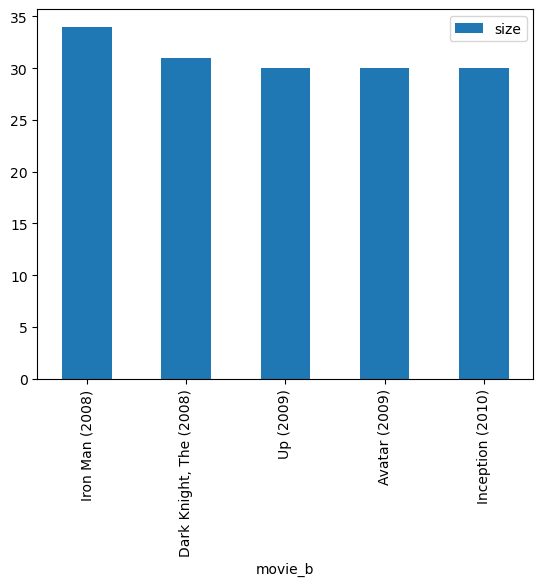

In [ ]:
recomendado_df[recomendado_df['size']>=30].plot.bar(x="movie_b")
plt.show()